<a href="https://colab.research.google.com/github/Yeicko10/House_sales/blob/main/House_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Leemos el archivo con los datos .CSV
df = pd.read_csv('/content/us_house_Sales_data.csv')

#Mostramos los primeros 5 datos
df.head()

,Price,Address,City,Zipcode,State,Bedrooms,Bathrooms,Area (Sqft),Lot Size,Year Built,Days on Market,Property Type,MLS ID,Listing Agent,Status,Listing URL
0,"$554,217","5926 Oak Ave, San Diego, CA 65383",San Diego,65383,CA,1 bds,3 ba,772 sqft,4757 sqft,1959,101,Townhouse,Z104635,Alex Johnson - Compass,For Sale,https://www.zillow.com/homedetails/80374762_zpid/
1,"$164,454","9583 Oak Ave, Fresno, IL 79339",Fresno,79339,IL,1 bds,1 ba,2348 sqft,3615 sqft,1969,46,Apartment,Z535721,Emily Davis - Century 21,Sold,https://www.zillow.com/homedetails/86143665_zpid/
2,"$1,249,331","8224 Oak Ave, Sacramento, TX 87393",Sacramento,87393,TX,6 bds,1 ba,3630 sqft,9369 sqft,1990,59,Townhouse,Z900458,Mike Lee - Coldwell Banker,For Sale,https://www.zillow.com/homedetails/37082403_zpid/
3,"$189,267","232 Oak Ave, Fresno, TX 38666",Fresno,38666,TX,2 bds,1 ba,605 sqft,8804 sqft,1958,119,Apartment,Z318589,John Doe - RE/MAX,Pending,https://www.zillow.com/homedetails/39318132_zpid/
4,"$465,778","5446 Pine Rd, Los Angeles, CA 23989",Los Angeles,23989,CA,3 bds,2 ba,1711 sqft,9260 sqft,2020,26,Townhouse,Z899716,John Doe - RE/MAX,Pending,https://www.zillow.com/homedetails/22454634_zpid/


In [3]:
#Mostramos el tamaño del conjunto de datos
df.shape

(3000, 16)

In [4]:
#Mostramos la información básica de cada una de las columnas (Nombre, valores nulos, Tipo de dato)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Price           3000 non-null   object
 1   Address         3000 non-null   object
 2   City            3000 non-null   object
 3   Zipcode         3000 non-null   int64 
 4   State           3000 non-null   object
 5   Bedrooms        3000 non-null   object
 6   Bathrooms       3000 non-null   object
 7   Area (Sqft)     3000 non-null   object
 8   Lot Size        3000 non-null   object
 9   Year Built      3000 non-null   int64 
 10  Days on Market  3000 non-null   int64 
 11  Property Type   3000 non-null   object
 12  MLS ID          3000 non-null   object
 13  Listing Agent   3000 non-null   object
 14  Status          3000 non-null   object
 15  Listing URL     3000 non-null   object
dtypes: int64(3), object(13)
memory usage: 375.1+ KB


In [5]:
#Mostramos los valores únicos de cada una de las columnas
df.nunique()

,0
Price,2996
Address,3000
City,5
Zipcode,2950
State,5
Bedrooms,6
Bathrooms,4
Area (Sqft),2013
Lot Size,2542
Year Built,74


In [6]:
#Buscamos si hay valores nulos en cada una de las columnas
df.isnull().sum()

,0
Price,0
Address,0
City,0
Zipcode,0
State,0
Bedrooms,0
Bathrooms,0
Area (Sqft),0
Lot Size,0
Year Built,0


In [7]:
#Convertir la columna 'Precios' a float
df['Price'] = df['Price'].str.replace(r'[^\d.]', '', regex=True).astype(float)

#convertir la columna 'Area (sqft)' a float
df['Area (Sqft)'] = df['Area (Sqft)'].str.replace(r'[^\d.]', '', regex=True).astype(float)

print(df[['Price','Area (Sqft)']].head())



       Price  Area (Sqft)
0   554217.0        772.0
1   164454.0       2348.0
2  1249331.0       3630.0
3   189267.0        605.0
4   465778.0       1711.0


In [8]:
#Mostramos las estadísticas de las columnas numéricas
df.describe()

,Price,Zipcode,Area (Sqft),Year Built,Days on Market
count,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000
mean,8.108594e+05,55264.197333,2278.950667,1986.814333,61.199333
std,3.997320e+05,25923.967932,977.406975,21.272252,34.890983
min,1.002830e+05,10006.000000,600.000000,1950.000000,1.000000
25%,4.703870e+05,33363.500000,1440.750000,1968.000000,31.000000
50%,8.156300e+05,55467.500000,2274.500000,1987.000000,62.000000
75%,1.158188e+06,77692.250000,3111.000000,2006.000000,91.000000
max,1.499473e+06,99955.000000,3999.000000,2023.000000,120.000000


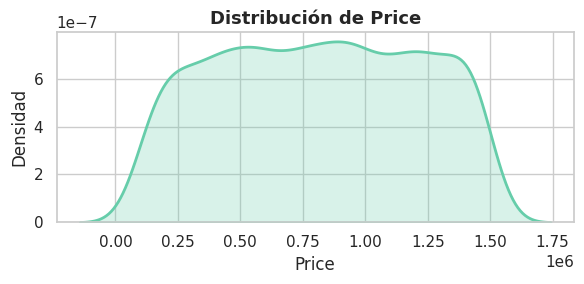

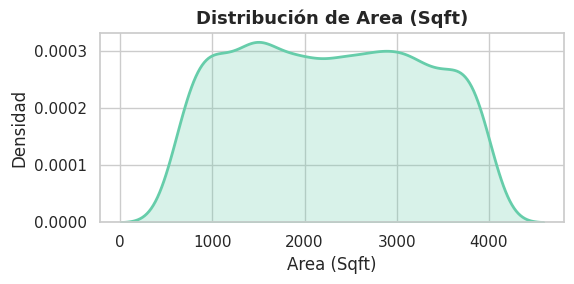

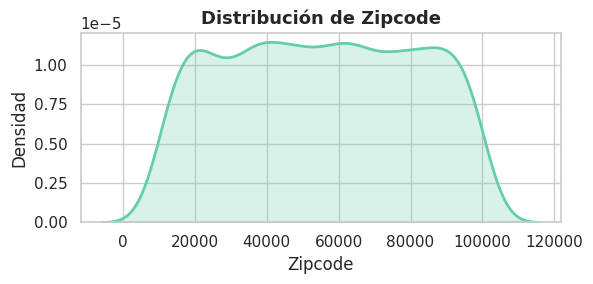

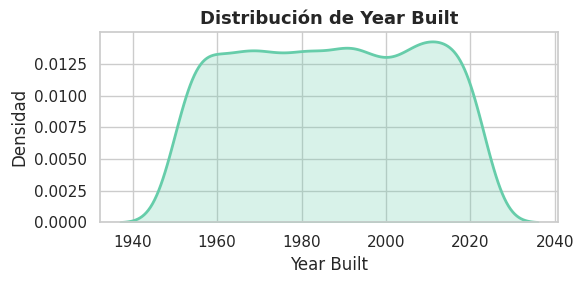

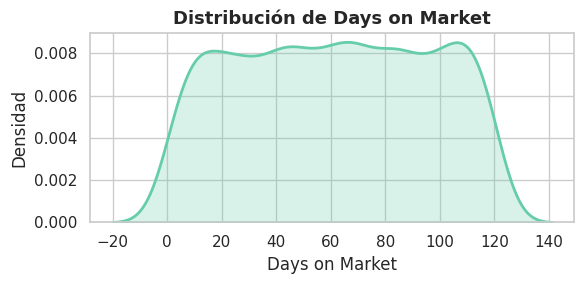

In [9]:
#Selesccionamos columnas para hacer un gráfico de densidad (KDE)
columns = ['Price','Area (Sqft)','Zipcode', 'Year Built', 'Days on Market']

#Elaboración de gráfica de densidad
sns.set(style='whitegrid')
for col in columns:
  plt.figure(figsize=(6,3))
  sns.kdeplot(df[col], fill=True, linewidth=2, color='mediumaquamarine')
  plt.title(f'Distribución de {col}', fontsize=13, fontweight='bold')
  plt.xlabel(col)
  plt.ylabel('Densidad')
  plt.tight_layout()
  plt.show()

/tmp/ipython-input-10-1907105199.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, palette='gnuplot')


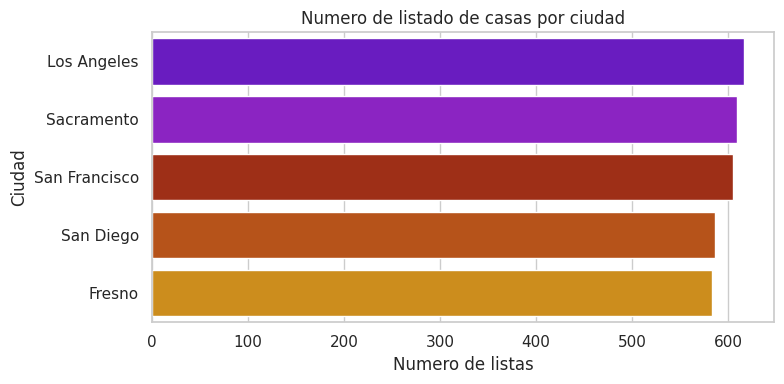

In [10]:
#Elegimos las columnas para hacer un gráfico de barras para conocer la cantidad
#de casas por ciudad
city_counts = df['City'].value_counts().head()

#Configuración del gráfico de barras
plt.figure(figsize=(8,4))
sns.barplot(x=city_counts.values, y=city_counts.index, palette='gnuplot')
plt.title('Numero de listado de casas por ciudad')
plt.xlabel('Numero de listas')
plt.ylabel('Ciudad')
plt.tight_layout()
plt.show()

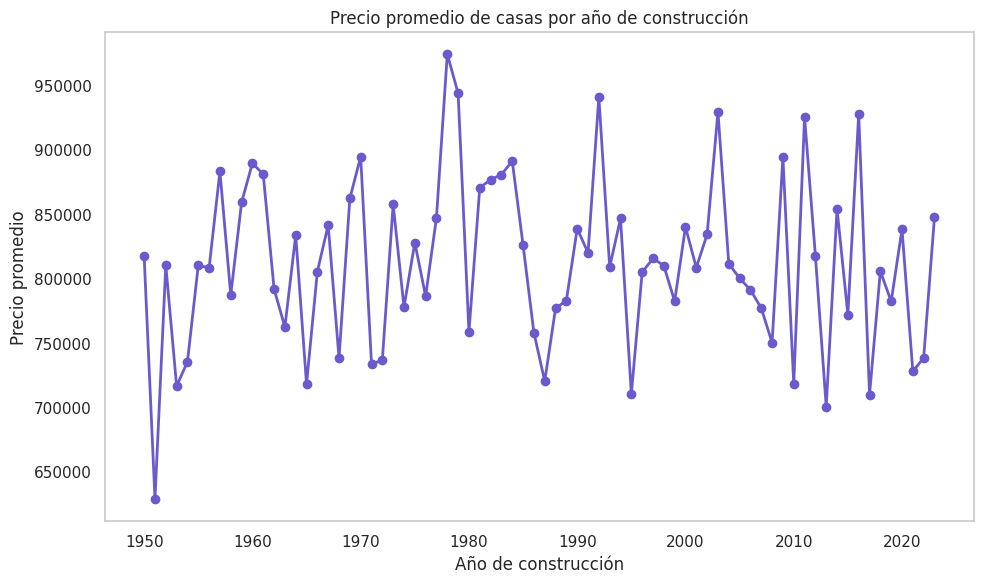

In [12]:
#Agrupamos Year Built y Price para examinar la evolución en los precios promedios de la casas
price_by_year = df.groupby('Year Built')['Price'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(price_by_year['Year Built'], price_by_year['Price'], marker='o', color='slateblue', linewidth=2)

plt.title('Precio promedio de casas por año de construcción')
plt.xlabel('Año de construcción')
plt.ylabel('Precio promedio')
plt.grid(False)
plt.tight_layout()
plt.show()

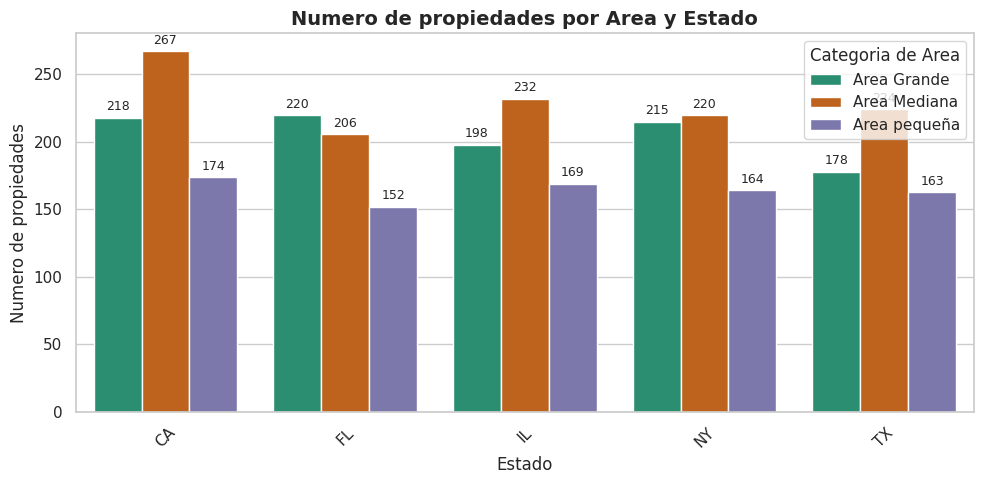

In [13]:
#Creamos una función para comparar el número de propiedades según el área
def clasificar_areas(area):
  if area <= 1500:
    return 'Area pequeña'
  elif area <= 2800:
    return 'Area Mediana'
  else:
    return 'Area Grande'

df['Area_Category'] = df['Area (Sqft)'].apply(clasificar_areas)

grouped = df.groupby(['State', 'Area_Category']).size().reset_index(name='Count')

plt.figure(figsize=(10,5))
ax = sns.barplot(data=grouped, x='State', y='Count', hue='Area_Category',palette='Dark2')

# Add value labels on top of bars
for container in ax.containers:
  ax.bar_label(container, padding=3, fontsize=9)

#Customize plot
plt.title('Numero de propiedades por Area y Estado', fontsize=14, fontweight='bold')
plt.xlabel('Estado')
plt.ylabel('Numero de propiedades')
plt.legend(title='Categoria de Area')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


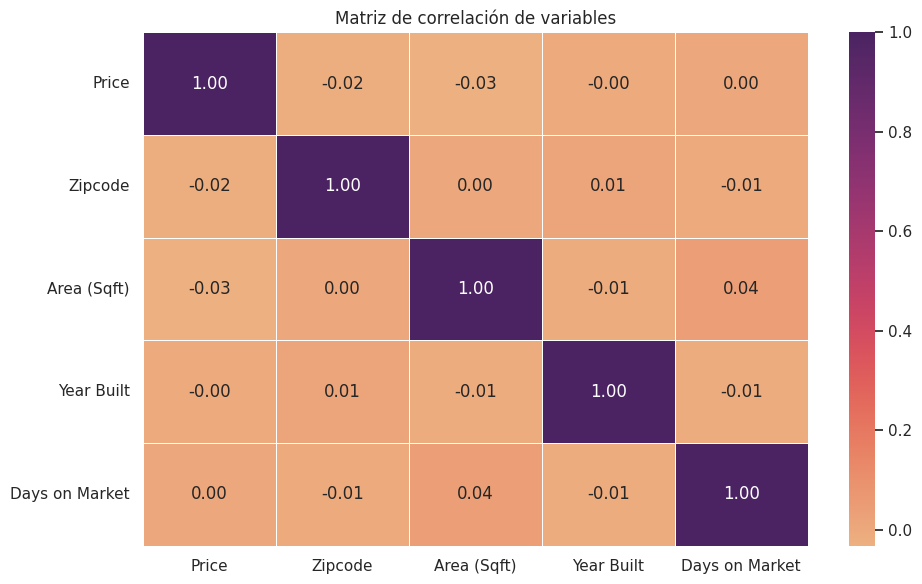

In [14]:
#Escogemos las columnas para hacer un gráfico de correlación
cols = ['Price','Zipcode', 'Area (Sqft)', 'Year Built', 'Days on Market']
correlation_matrix = df[cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', linewidths=0.5, fmt='.2f')

plt.title('Matriz de correlación de variables')
plt.tight_layout()
plt.show()


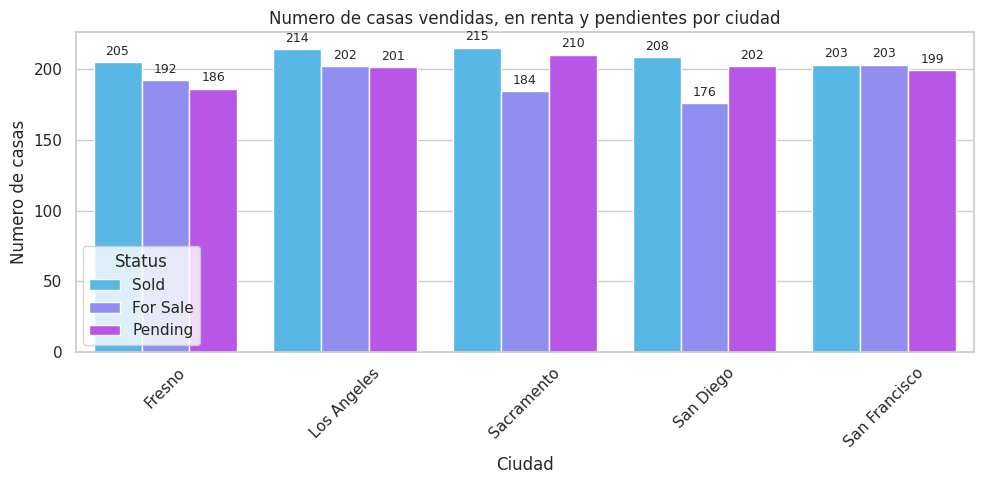

In [15]:
#Gráfico de barras para analizar la cantidas de propiedades vendidas, en renta y pendientes por ciudad
Casas_vendidas = df.groupby('City')['Status'].value_counts().reset_index()


plt.figure(figsize=(10,5))
ax = sns.barplot(x=Casas_vendidas['City'], y=Casas_vendidas['count'], hue=Casas_vendidas['Status'], palette='cool')
plt.title('Numero de casas vendidas, en renta y pendientes por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Numero de casas')
plt.legend(title='Status')
plt.xticks(rotation=45)

# Add value labels on top of bars
for container in ax.containers:
  ax.bar_label(container, padding=3, fontsize=9)

plt.tight_layout()
plt.show()